In [62]:
import pandas as pd
import numpy as np
import matplotlib as mat 
%matplotlib inline
import matplotlib.pyplot as plt
import time as ti
from pandas.tseries.offsets import *
from scipy import stats
from datetime import datetime, date, time, timedelta
s = pd.Series
import scipy.stats as st
from scipy.stats import kurtosis
from scipy.stats import skew
from arch import arch_model
from arch.univariate import ConstantMean, GARCH, Normal
import seaborn
import pandas_datareader as pdr
import statsmodels.api as sm

In [2]:
#ersetze in RET C und B mit nan
missing_values=["C","B",".","-66.0","-77.0","-88.0","-99.0"]

In [4]:
crsp_d = pd.read_csv("./Data/Stockreturn_daily_1960-2018.csv",na_values=missing_values)
#crsp_d = pd.read_csv("./Data/SIC-daily_1960-1980.csv",na_values=missing_values)
#crsp_m = pd.read_csv("./Data/Test.csv",na_values = missing_values)

crsp_d['date']=[datetime.strptime(str(date), "%Y%m%d")
for date in crsp_d['date']]

print(crsp_d.shape)

crsp_d.head()

(50884166, 7)


,PERMNO,date,SHRCD,EXCHCD,SICCD,PRC,RET
0,10001,1986-09-02,11,3,4920,6.75,0.038462
1,10001,1986-09-03,11,3,4920,7.00,0.037037
2,10001,1986-09-04,11,3,4920,6.75,-0.035714
3,10001,1986-09-05,11,3,4920,6.50,-0.037037
4,10001,1986-09-08,11,3,4920,6.75,0.054615


In [5]:
crsp_d[['PERMNO','SHRCD','EXCHCD']] = crsp_d[['PERMNO', 'SHRCD','EXCHCD']].astype(int)
#crsp_d['RET']=crsp_d['RET'].fillna(0)
crsp_d['logret']=np.log(1+crsp_d['RET'])


In [6]:
#print (crsp_d)

In [7]:
pivd=crsp_d.pivot(index='date',columns='PERMNO',values= ['RET'])

In [8]:
print(pivd) 

             RET                                                      \
PERMNO     10001 10002 10003     10006 10008 10009 10010 10011 10012   
date                                                                   
1960-01-04   NaN   NaN   NaN  0.038660   NaN   NaN   NaN   NaN   NaN   
1960-01-05   NaN   NaN   NaN  0.022333   NaN   NaN   NaN   NaN   NaN   
1960-01-06   NaN   NaN   NaN  0.000000   NaN   NaN   NaN   NaN   NaN   
1960-01-07   NaN   NaN   NaN -0.014563   NaN   NaN   NaN   NaN   NaN   
1960-01-08   NaN   NaN   NaN -0.007389   NaN   NaN   NaN   NaN   NaN   
1960-01-11   NaN   NaN   NaN -0.017370   NaN   NaN   NaN   NaN   NaN   
1960-01-12   NaN   NaN   NaN -0.005051   NaN   NaN   NaN   NaN   NaN   
1960-01-13   NaN   NaN   NaN -0.005076   NaN   NaN   NaN   NaN   NaN   
1960-01-14   NaN   NaN   NaN  0.030612   NaN   NaN   NaN   NaN   NaN   
1960-01-15   NaN   NaN   NaN  0.009901   NaN   NaN   NaN   NaN   NaN   
1960-01-18   NaN   NaN   NaN -0.004902   NaN   NaN   NaN   NaN  

In [9]:
#piv_sic=crsp_d.pivot(index='date',columns='PERMNO',values= ['logret'])

In [10]:
CR_df = pivd.copy()
CR_df_columns = pivd.columns
CR_df_index = pivd.index.to_series()
CR_df = pd.DataFrame(index=CR_df_index, dtype=float, columns=CR_df_columns)
#print(CR_df)

In [11]:
leni=len(CR_df_index)
lenj=len(CR_df_columns)

In [12]:
null_matrix = pivd.isna()

In [13]:
#If observations i all 126 days are available

#null_matrix = pivd.isna().to_numpy()
#for i in range(leni):
#        col_index = np.sum(null_matrix[i-126:i,:], axis=0) ==0   
    #pivd.iloc[i-126:i-22, col_index]
#        CR_df.iloc[i, col_index] = np.sum(pivd.iloc[i-126:i-22,col_index], axis=0)

In [14]:
#If at least 100 observations in last 126 days are available
#needs ~  5.5 hours 

start = ti.time()

null_matrix = pivd.isna().to_numpy()
for i in range(leni):
        col_index = (np.sum(null_matrix[i:i+20,:], axis=0) ==0) & (np.sum(null_matrix[i-126:i,:], axis=0) < 27)
    #pivd.iloc[i-126:i-22, col_index]
        CR_df.iloc[i, col_index] = np.sum(pivd.iloc[i-126:i-10,col_index],axis=0)

end = ti.time()
print(end - start)       

16156.940562009811


In [15]:
print(null_matrix)

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ... False  True False]
 [ True  True  True ... False  True False]
 [ True  True  True ... False  True False]]


In [16]:
print (CR_df)

             RET                                                        ...  \
PERMNO     10001 10002 10003 10006 10008 10009 10010 10011 10012 10014  ...   
date                                                                    ...   
1960-01-04   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-01-05   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-01-06   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-01-07   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-01-08   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-01-11   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-01-12   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-01-13   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-01-14   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-01-15   NaN   NaN   NaN   0.0   NaN   NaN   NaN

In [17]:
PT_df = CR_df.quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], axis=1).transpose()
PT_df.columns = ['Percentile 10','Percentile 20','Percentile 30','Percentile 40','Percentile 50','Percentile 60','Percentile 70','Percentile 80','Percentile 90']

In [18]:
top_ninety=PT_df['Percentile 90'].to_numpy()
true_table_d10 = CR_df.ge(top_ninety, axis=0)

bottom_ten=PT_df['Percentile 10'].to_numpy()
true_table_d1 = CR_df.le(bottom_ten, axis=0)

In [19]:
top_ninety=PT_df['Percentile 90'].to_numpy()

PT_90=PT_df['Percentile 90'].to_numpy()
PT_80=PT_df['Percentile 80'].to_numpy()
PT_70=PT_df['Percentile 70'].to_numpy()
PT_60=PT_df['Percentile 60'].to_numpy()
PT_50=PT_df['Percentile 50'].to_numpy()
PT_40=PT_df['Percentile 40'].to_numpy()
PT_30=PT_df['Percentile 30'].to_numpy()
PT_20=PT_df['Percentile 20'].to_numpy()
PT_10=PT_df['Percentile 10'].to_numpy()


true_table_d10 = CR_df.ge(PT_90, axis=0)
true_table_d9 = CR_df.ge(PT_80, axis=0) & CR_df.le(PT_90, axis=0)
true_table_d8 = CR_df.ge(PT_70, axis=0) & CR_df.le(PT_80, axis=0)
true_table_d7 = CR_df.ge(PT_60, axis=0) & CR_df.le(PT_70, axis=0)
true_table_d6 = CR_df.ge(PT_50, axis=0) & CR_df.le(PT_60, axis=0)
true_table_d5 = CR_df.ge(PT_40, axis=0) & CR_df.le(PT_50, axis=0)
true_table_d4 = CR_df.ge(PT_30, axis=0) & CR_df.le(PT_40, axis=0)
true_table_d3 = CR_df.ge(PT_20, axis=0) & CR_df.le(PT_30, axis=0)
true_table_d2 = CR_df.ge(PT_10, axis=0) & CR_df.le(PT_20, axis=0)
true_table_d1 = CR_df.le(PT_10, axis=0)



In [20]:
print(np.sum(pivd[true_table_d10], axis=1))

date
1960-01-04     4.381207
1960-01-05     4.944033
1960-01-06    -2.878762
1960-01-07    -2.384909
1960-01-08    -0.716722
1960-01-11    -5.340818
1960-01-12    -2.913457
1960-01-13    -1.615054
1960-01-14     4.630364
1960-01-15     1.161513
1960-01-18    -6.556039
1960-01-19    -6.267387
1960-01-20    -0.997517
1960-01-21     1.503535
1960-01-22     2.360796
1960-01-25    -8.335905
1960-01-26     1.179009
1960-01-27    -1.887311
1960-01-28    -6.244879
1960-01-29    -8.561412
1960-02-01     1.127107
1960-02-02    10.916333
1960-02-03    -5.467393
1960-02-04    -1.265804
1960-02-05    -4.783591
1960-02-08    -6.920717
1960-02-09     6.849150
1960-02-10    -1.665882
1960-02-11    -2.266048
1960-02-12     2.372593
                ...    
2018-11-15     3.542022
2018-11-16     0.888377
2018-11-19   -10.090552
2018-11-20    -5.169137
2018-11-21     5.598588
2018-11-23     3.264907
2018-11-26     3.314059
2018-11-27    -1.778893
2018-11-28     8.026880
2018-11-29     0.251283
2018-11-30 

In [21]:
Daily_d10_df = np.sum(pivd[true_table_d10], axis=1)/np.sum(true_table_d10, axis=1)
Daily_d10_df[0:126] = 0
Daily_d9_df = np.sum(pivd[true_table_d9], axis=1)/np.sum(true_table_d9, axis=1)
Daily_d9_df[0:126] = 0
Daily_d8_df = np.sum(pivd[true_table_d8], axis=1)/np.sum(true_table_d8, axis=1)
Daily_d8_df[0:126] = 0
Daily_d7_df = np.sum(pivd[true_table_d7], axis=1)/np.sum(true_table_d7, axis=1)
Daily_d7_df[0:126] = 0
Daily_d6_df = np.sum(pivd[true_table_d6], axis=1)/np.sum(true_table_d6, axis=1)
Daily_d6_df[0:126] = 0
Daily_d5_df = np.sum(pivd[true_table_d5], axis=1)/np.sum(true_table_d5, axis=1)
Daily_d5_df[0:126] = 0
Daily_d4_df = np.sum(pivd[true_table_d4], axis=1)/np.sum(true_table_d4, axis=1)
Daily_d4_df[0:126] = 0
Daily_d3_df = np.sum(pivd[true_table_d3], axis=1)/np.sum(true_table_d3, axis=1)
Daily_d3_df[0:126] = 0
Daily_d2_df = np.sum(pivd[true_table_d2], axis=1)/np.sum(true_table_d2, axis=1)
Daily_d2_df[0:126] = 0
Daily_d1_df = np.sum(pivd[true_table_d1], axis=1)/np.sum(true_table_d1, axis=1)
Daily_d1_df[0:126] = 0

Daily_wml_df = Daily_d10_df - Daily_d1_df

In [22]:
Daily_wml_1 = Daily_wml_df+1
Daily_d10_1 = Daily_d10_df+1
Daily_d9_1 = Daily_d9_df+1
Daily_d8_1 = Daily_d8_df+1
Daily_d7_1 = Daily_d7_df+1
Daily_d6_1 = Daily_d6_df+1
Daily_d5_1 = Daily_d5_df+1
Daily_d4_1 = Daily_d4_df+1
Daily_d3_1 = Daily_d3_df+1
Daily_d2_1 = Daily_d2_df+1
Daily_d1_1 = Daily_d1_df+1

In [23]:
Daily_cum_wml_df = Daily_wml_1.copy()
Daily_cum_wml_df = Daily_cum_wml_df.iloc[:]
Daily_cum_wml_df = s.cumprod(Daily_cum_wml_df)

Daily_cum_d10_df = Daily_d10_1.copy()
Daily_cum_d10_df = Daily_cum_d10_df.iloc[:]
Daily_cum_d10_df = s.cumprod(Daily_cum_d10_df)

Daily_cum_d9 = Daily_d9_1.copy()
Daily_cum_d9 = Daily_cum_d9.iloc[:]
Daily_cum_d9 = s.cumprod(Daily_cum_d9)

Daily_cum_d8 = Daily_d8_1.copy()
Daily_cum_d8 = Daily_cum_d8.iloc[:]
Daily_cum_d8 = s.cumprod(Daily_cum_d8)

Daily_cum_d7 = Daily_d7_1.copy()
Daily_cum_d7 = Daily_cum_d7.iloc[:]
Daily_cum_d7 = s.cumprod(Daily_cum_d7)

Daily_cum_d6 = Daily_d6_1.copy()
Daily_cum_d6 = Daily_cum_d6.iloc[:]
Daily_cum_d6 = s.cumprod(Daily_cum_d6)

Daily_cum_d5 = Daily_d5_1.copy()
Daily_cum_d5 = Daily_cum_d5.iloc[:]
Daily_cum_d5 = s.cumprod(Daily_cum_d5)

Daily_cum_d4 = Daily_d4_1.copy()
Daily_cum_d4 = Daily_cum_d4.iloc[:]
Daily_cum_d4 = s.cumprod(Daily_cum_d4)

Daily_cum_d3 = Daily_d3_1.copy()
Daily_cum_d3 = Daily_cum_d3.iloc[:]
Daily_cum_d3 = s.cumprod(Daily_cum_d3)

Daily_cum_d2 = Daily_d2_1.copy()
Daily_cum_d2 = Daily_cum_d2.iloc[:]
Daily_cum_d2 = s.cumprod(Daily_cum_d2)

Daily_cum_d1_df = Daily_d1_1.copy()
Daily_cum_d1_df = Daily_cum_d1_df.iloc[:]
Daily_cum_d1_df = s.cumprod(Daily_cum_d1_df)

In [24]:
CR_df[true_table_d10]

RET                                                        ...  \
PERMNO     10001 10002 10003 10006 10008 10009 10010 10011 10012 10014  ...   
date                                                                    ...   
1960-01-04   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-01-05   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-01-06   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-01-07   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-01-08   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-01-11   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-01-12   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-01-13   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-01-14   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-01-15   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-01-18   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-01-19   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-01-20   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-01-21   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-01-22   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-01-25   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-01-26   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-01-27   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-01-28   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-01-29   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-02-01   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-02-02   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-02-03   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-02-04   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-02-05   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-02-08   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-02-09   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-02-10   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-02-11   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-02-12   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
2018-11-15   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2018-11-16   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2018-11-19   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2018-11-20   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2018-11-21   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2018-11-23   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2018-11-26   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2018-11-27   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2018-11-28   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2018-11-29   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2018-11-30   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2018-12-03   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2018-12-04   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2018-12-06   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2018-12-07   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2018-12-10   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2018-12-11   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   Na

In [25]:
#insert the future retruns for the next month in a matrix, every day, for each company. 
#=> later use only every 21 day for the d10 and d1

In [26]:
FF3_df = pd.read_csv("./data/F-F_3_Factors_daily.csv",delimiter=';')
headers = FF3_df.iloc[0]
#FF3_df.columns = ['Date' if x=='Unnamed: 0' else  x for x in FF3_df.columns]

FF3_df.reset_index()
FF3_df.index=(pivd.index)

In [27]:
print(FF3_df)

            Mkt-RF   SMB   HML     RF
date                                 
1960-01-04   -0.03  0.60  0.70  0.017
1960-01-05    0.78 -0.40  0.54  0.017
1960-01-06   -0.47  0.13  0.36  0.017
1960-01-07   -0.65  0.37  0.08  0.017
1960-01-08   -0.33  0.18  0.10  0.017
1960-01-11   -1.15  0.48  0.32  0.017
1960-01-12   -0.58  0.01  0.45  0.017
1960-01-13   -0.53  0.38  0.04  0.017
1960-01-14    0.56 -0.20  0.13  0.017
1960-01-15    0.01  0.38  0.15  0.017
1960-01-18   -0.84  0.22 -0.23  0.017
1960-01-19   -1.00  0.01  0.25  0.017
1960-01-20   -0.30  0.18  0.07  0.017
1960-01-21    0.22  0.03  0.22  0.017
1960-01-22    0.28  0.04 -0.25  0.017
1960-01-25   -1.05 -0.14 -0.10  0.017
1960-01-26    0.15 -0.18  0.16  0.017
1960-01-27   -0.28 -0.03  0.13  0.017
1960-01-28   -1.00  0.42 -0.18  0.017
1960-01-29   -0.97 -0.28 -0.07  0.017
1960-02-01    0.50 -0.50 -0.22  0.014
1960-02-02    1.54 -0.17 -0.43  0.014
1960-02-03   -0.83  0.31 -0.02  0.014
1960-02-04   -0.08 -0.08  0.19  0.014
1960-02-05  

In [28]:
FF3_df = FF3_df /100
print(FF3_df)

            Mkt-RF     SMB     HML       RF
date                                       
1960-01-04 -0.0003  0.0060  0.0070  0.00017
1960-01-05  0.0078 -0.0040  0.0054  0.00017
1960-01-06 -0.0047  0.0013  0.0036  0.00017
1960-01-07 -0.0065  0.0037  0.0008  0.00017
1960-01-08 -0.0033  0.0018  0.0010  0.00017
1960-01-11 -0.0115  0.0048  0.0032  0.00017
1960-01-12 -0.0058  0.0001  0.0045  0.00017
1960-01-13 -0.0053  0.0038  0.0004  0.00017
1960-01-14  0.0056 -0.0020  0.0013  0.00017
1960-01-15  0.0001  0.0038  0.0015  0.00017
1960-01-18 -0.0084  0.0022 -0.0023  0.00017
1960-01-19 -0.0100  0.0001  0.0025  0.00017
1960-01-20 -0.0030  0.0018  0.0007  0.00017
1960-01-21  0.0022  0.0003  0.0022  0.00017
1960-01-22  0.0028  0.0004 -0.0025  0.00017
1960-01-25 -0.0105 -0.0014 -0.0010  0.00017
1960-01-26  0.0015 -0.0018  0.0016  0.00017
1960-01-27 -0.0028 -0.0003  0.0013  0.00017
1960-01-28 -0.0100  0.0042 -0.0018  0.00017
1960-01-29 -0.0097 -0.0028 -0.0007  0.00017
1960-02-01  0.0050 -0.0050 -0.00

In [29]:
FF3_null_matrix = FF3_df.isna()

In [30]:
FF3 = pivd.copy()
FF3_columns = FF3_df.columns
FF3_index = FF3_df.index.to_series()
FF3 = pd.DataFrame(index=FF3_index, dtype=float, columns=FF3_columns)

In [31]:
start = ti.time() 

FF3_null_matrix = FF3_df.isna().to_numpy()
for i in range (leni):
        col_index3 = np.sum(FF3_null_matrix[i:i+20, : ],axis = 0) ==0

        FF3.iloc[i,col_index3] = np.sum(FF3_df.iloc[i:i+20,col_index3],axis = 0)

              
end = ti.time()
print(end - start) 

16.699811220169067


In [32]:
Daily_Mkt = (FF3_df['RF'])+(FF3_df['Mkt-RF'])
Daily_Mkt[0:125] = 0
Mkt = Daily_Mkt[126::21]
Mkt_1 = Mkt+1

Daily_RF= FF3_df['RF']
Daily_RF[0:125] = 0
RF = Daily_RF[126::21]
RF_1=RF+1

Daily_Mkt_RF=(FF3_df['Mkt-RF'])
Daily_Mkt_RF[0:125] = 0
Mkt_RF = Daily_Mkt_RF[126::21] 
Mkt_RF_1 = Mkt_RF+1

In [33]:
Daily_RF_1 = Daily_RF + 1
Daily_cum_RF = Daily_RF_1.copy()
Daily_cum_RF = s.cumprod(Daily_cum_RF)

Daily_Mkt_1 = Daily_Mkt + 1
Daily_cum_Mkt = Daily_Mkt_1.copy()
Daily_cum_Mkt = s.cumprod(Daily_cum_Mkt)

Daily_Mkt_RF_1 = Daily_Mkt_RF + 1
Daily_cum_Mkt_RF = Daily_Mkt_RF_1.copy()
Daily_cum_Mkt_RF = s.cumprod(Daily_cum_Mkt_RF)

In [34]:
print(Mkt_1)

date
1960-07-01    1.00247
1960-08-02    0.99187
1960-08-31    1.00227
1960-09-30    1.01788
1960-10-31    0.99930
1960-12-01    0.99617
1961-01-03    0.99129
1961-02-01    1.00318
1961-03-03    1.00149
1961-04-04    1.00029
1961-05-03    1.00808
1961-06-05    1.00519
1961-07-05    1.00629
1961-08-03    1.00536
1961-09-01    1.00218
1961-10-03    0.99928
1961-11-01    1.00218
1961-12-04    1.00229
1962-01-04    0.99181
1962-02-02    1.00781
1962-03-06    0.99679
1962-04-04    0.99471
1962-05-04    0.99531
1962-06-05    1.00489
1962-07-05    1.00613
1962-08-03    1.00220
1962-09-04    0.99041
1962-10-03    1.00151
1962-11-01    1.01020
1962-12-04    1.01092
               ...   
2016-07-27    0.99861
2016-08-25    0.99921
2016-09-26    0.99121
2016-10-25    0.99541
2016-11-23    1.00161
2016-12-23    1.00191
2017-01-26    0.99902
2017-02-27    1.00222
2017-03-28    1.00721
2017-04-27    1.00053
2017-05-26    1.00063
2017-06-27    0.99163
2017-07-27    0.99864
2017-08-25    1.00184
2017-

In [37]:
cumulative_Mkt = Mkt_1.copy()
cumulative_Mkt = s.cumprod(cumulative_Mkt)

cumulative_RF = RF_1.copy()
cumulative_RF = s.cumprod(cumulative_RF)

cumulative_Mkt_RF = Mkt_RF_1.copy()
cumulative_Mkt_RF = s.cumprod(cumulative_Mkt_RF)




In [38]:
print(cumulative_Mkt)

date
1960-07-01    1.002470
1960-08-02    0.994320
1960-08-31    0.996577
1960-09-30    1.014396
1960-10-31    1.013686
1960-12-01    1.009803
1961-01-03    1.001008
1961-02-01    1.004191
1961-03-03    1.005687
1961-04-04    1.005979
1961-05-03    1.014107
1961-06-05    1.019371
1961-07-05    1.025782
1961-08-03    1.031281
1961-09-01    1.033529
1961-10-03    1.032785
1961-11-01    1.035036
1961-12-04    1.037406
1962-01-04    1.028910
1962-02-02    1.036946
1962-03-06    1.033617
1962-04-04    1.028149
1962-05-04    1.023327
1962-06-05    1.028331
1962-07-05    1.034635
1962-08-03    1.036911
1962-09-04    1.026967
1962-10-03    1.028518
1962-11-01    1.039009
1962-12-04    1.050355
                ...   
2016-07-27    1.587712
2016-08-25    1.586458
2016-09-26    1.572513
2016-10-25    1.565295
2016-11-23    1.567815
2016-12-23    1.570810
2017-01-26    1.569270
2017-02-27    1.572754
2017-03-28    1.584094
2017-04-27    1.584933
2017-05-26    1.585932
2017-06-27    1.572658
2017-0

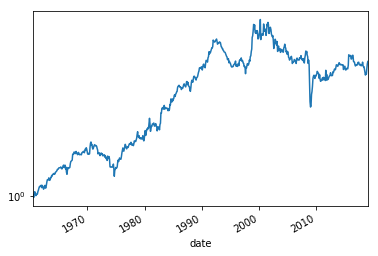

In [39]:
plt.yscale('log')
cumulative_Mkt.plot()

In [40]:
Momentum_Daily = pd.concat([Daily_d1_df,Daily_d2_df,Daily_d3_df,Daily_d4_df,Daily_d5_df,Daily_d6_df,Daily_d7_df,Daily_d8_df,Daily_d9_df,Daily_d10_df,Daily_wml_df,Daily_Mkt,Daily_RF,Daily_Mkt_RF], axis=1, join_axes=[Daily_d1_df.index])
Momentum_Daily.columns = ["D1", "D2", "D3", "D4","D5","D6","D7","D8","D9","D10","WML","Mkt","Rf","Mkt-Rf"]
print(Momentum_Daily)

                  D1        D2        D3        D4        D5        D6  \
date                                                                     
1960-01-04  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1960-01-05  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1960-01-06  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1960-01-07  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1960-01-08  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1960-01-11  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1960-01-12  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1960-01-13  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1960-01-14  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1960-01-15  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1960-01-18  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1960-01-19  0.000000  0.000000  0.0000

In [41]:
#Momentum_Daily.to_excel(r'Momentum_Daily.xlsx')

In [42]:
null_matrix = pivd.isna()
mr_df = pivd.copy()
mr_df_columns = pivd.columns
mr_df_index = pivd.index.to_series()
mr_df = pd.DataFrame(index=mr_df_index, dtype=float, columns=mr_df_columns)

In [43]:
#needs ~ 4.5 hours

start = ti.time() 

null_matrix = pivd.isna().to_numpy()
for i in range (leni):
        col_index2 = np.sum(null_matrix[i:i+20, : ],axis = 0) ==0

        mr_df.iloc[i,col_index2] = np.sum(pivd.iloc[i:i+20,col_index2],axis = 0)

              
end = ti.time()
print(end - start) 

21140.742127656937


In [44]:
np.sum(mr_df[true_table_d10], axis=1)

date
1960-01-04   -33.250083
1960-01-05   -36.145983
1960-01-06   -30.404912
1960-01-07   -32.486451
1960-01-08   -30.938078
1960-01-11   -33.788309
1960-01-12   -35.021114
1960-01-13   -26.663498
1960-01-14   -27.078717
1960-01-15   -32.734516
1960-01-18   -35.129640
1960-01-19   -31.667349
1960-01-20   -34.724358
1960-01-21   -27.628703
1960-01-22   -19.088160
1960-01-25   -15.128718
1960-01-26    -8.480098
1960-01-27   -11.511213
1960-01-28    -6.365510
1960-01-29     3.399747
1960-02-01    11.754600
1960-02-02     9.971230
1960-02-03    -6.879354
1960-02-04   -13.775623
1960-02-05   -19.055744
1960-02-08   -22.927671
1960-02-09   -23.711302
1960-02-10   -20.907746
1960-02-11   -19.087538
1960-02-12   -10.382491
                ...    
2018-11-15   -16.780493
2018-11-16   -32.172633
2018-11-19   -37.001592
2018-11-20   -32.728571
2018-11-21   -36.418474
2018-11-23   -49.157580
2018-11-26   -54.858628
2018-11-27   -41.564115
2018-11-28   -38.049935
2018-11-29   -37.555894
2018-11-30 

In [45]:
np.sum(true_table_d10, axis=1)

date
1960-01-04    736
1960-01-05    732
1960-01-06    723
1960-01-07    712
1960-01-08    695
1960-01-11    689
1960-01-12    681
1960-01-13    688
1960-01-14    688
1960-01-15    677
1960-01-18    747
1960-01-19    743
1960-01-20    742
1960-01-21    742
1960-01-22    740
1960-01-25    738
1960-01-26    738
1960-01-27    730
1960-01-28    735
1960-01-29    737
1960-02-01    738
1960-02-02    735
1960-02-03    733
1960-02-04    731
1960-02-05    741
1960-02-08    744
1960-02-09    742
1960-02-10    743
1960-02-11    745
1960-02-12    738
             ... 
2018-11-15    308
2018-11-16    308
2018-11-19    308
2018-11-20    309
2018-11-21    308
2018-11-23    307
2018-11-26    307
2018-11-27    307
2018-11-28    307
2018-11-29    307
2018-11-30    308
2018-12-03    308
2018-12-04    308
2018-12-06    308
2018-12-07    309
2018-12-10    309
2018-12-11    310
2018-12-12    311
2018-12-13    311
2018-12-14    312
2018-12-17    313
2018-12-18    313
2018-12-19    314
2018-12-20    315
2018-

In [46]:
winner = np.sum(mr_df[true_table_d10], axis=1)/np.sum(true_table_d10, axis=1)
winner[0:126] = 0


In [47]:
# => use only every 21 day for the d10 Portfolio

d10 = winner[127::21]

In [48]:
print (d10)

date
1960-07-05   -0.053433
1960-08-03    0.053827
1960-09-01   -0.099977
1960-10-03   -0.020340
1960-11-01    0.094304
1960-12-02    0.045076
1961-01-04    0.079404
1961-02-02    0.077559
1961-03-06    0.085663
1961-04-05    0.037430
1961-05-04   -0.014511
1961-06-06   -0.044612
1961-07-06   -0.014179
1961-08-04    0.017159
1961-09-05   -0.041780
1961-10-04    0.032719
1961-11-02    0.058009
1961-12-05   -0.041252
1962-01-05   -0.009952
1962-02-05    0.021839
1962-03-07   -0.007237
1962-04-05   -0.021792
1962-05-07   -0.178678
1962-06-06    0.002149
1962-07-06    0.043988
1962-08-06    0.043460
1962-09-05   -0.058621
1962-10-04   -0.010293
1962-11-02    0.080651
1962-12-05    0.000846
                ...   
2016-07-28    0.027747
2016-08-26    0.044274
2016-09-27   -0.022865
2016-10-26    0.058713
2016-11-25   -0.007791
2016-12-27    0.016847
2017-01-27    0.001140
2017-02-28   -0.025330
2017-03-29    0.025486
2017-04-28   -0.016509
2017-05-30    0.043762
2017-06-28    0.039833
2017-0

In [49]:
bottom_ten=PT_df['Percentile 10'].to_numpy()
true_table_d1 = CR_df.le(bottom_ten, axis=0)

In [50]:
#print(true_table_d1)

In [51]:
CR_df[true_table_d1]

RET                                                        ...  \
PERMNO     10001 10002 10003 10006 10008 10009 10010 10011 10012 10014  ...   
date                                                                    ...   
1960-01-04   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-01-05   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-01-06   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-01-07   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-01-08   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-01-11   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-01-12   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1960-01-13   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-01-14   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-01-15   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-01-18   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-01-19   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-01-20   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-01-21   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-01-22   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-01-25   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-01-26   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-01-27   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-01-28   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-01-29   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-02-01   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-02-02   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-02-03   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-02-04   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-02-05   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-02-08   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-02-09   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-02-10   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-02-11   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
1960-02-12   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   0.0  ...   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
2018-11-15   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2018-11-16   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2018-11-19   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2018-11-20   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2018-11-21   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2018-11-23   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2018-11-26   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2018-11-27   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2018-11-28   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2018-11-29   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2018-11-30   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2018-12-03   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2018-12-04   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2018-12-06   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2018-12-07   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2018-12-10   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2018-12-11   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   Na

In [52]:
np.sum(mr_df[true_table_d1], axis=1)

date
1960-01-04   -34.982199
1960-01-05   -38.418668
1960-01-06   -32.036025
1960-01-07   -34.662225
1960-01-08   -33.414967
1960-01-11   -37.416043
1960-01-12    -3.993967
1960-01-13   -28.547029
1960-01-14   -28.806632
1960-01-15   -35.929038
1960-01-18   -35.129640
1960-01-19   -31.667349
1960-01-20   -34.724358
1960-01-21   -27.628703
1960-01-22   -19.088160
1960-01-25   -15.128718
1960-01-26    -8.480098
1960-01-27   -11.511213
1960-01-28    -6.365510
1960-01-29     3.399747
1960-02-01    11.754600
1960-02-02     9.971230
1960-02-03    -6.879354
1960-02-04   -13.775623
1960-02-05   -19.055744
1960-02-08   -22.927671
1960-02-09   -23.711302
1960-02-10   -20.907746
1960-02-11   -19.087538
1960-02-12   -10.382491
                ...    
2018-11-15   -34.846421
2018-11-16   -49.704657
2018-11-19   -50.622356
2018-11-20   -48.630479
2018-11-21   -47.064811
2018-11-23   -61.144784
2018-11-26   -62.968915
2018-11-27   -55.566229
2018-11-28   -56.793967
2018-11-29   -60.584125
2018-11-30 

In [53]:
np.sum(true_table_d1, axis=1)

date
1960-01-04    748
1960-01-05    748
1960-01-06    738
1960-01-07    741
1960-01-08    735
1960-01-11    733
1960-01-12     77
1960-01-13    733
1960-01-14    728
1960-01-15    721
1960-01-18    747
1960-01-19    743
1960-01-20    742
1960-01-21    742
1960-01-22    740
1960-01-25    738
1960-01-26    738
1960-01-27    730
1960-01-28    735
1960-01-29    737
1960-02-01    738
1960-02-02    735
1960-02-03    733
1960-02-04    731
1960-02-05    741
1960-02-08    744
1960-02-09    742
1960-02-10    743
1960-02-11    745
1960-02-12    738
             ... 
2018-11-15    308
2018-11-16    308
2018-11-19    308
2018-11-20    309
2018-11-21    308
2018-11-23    307
2018-11-26    307
2018-11-27    307
2018-11-28    307
2018-11-29    307
2018-11-30    308
2018-12-03    308
2018-12-04    308
2018-12-06    308
2018-12-07    309
2018-12-10    309
2018-12-11    310
2018-12-12    311
2018-12-13    311
2018-12-14    312
2018-12-17    313
2018-12-18    313
2018-12-19    314
2018-12-20    315
2018-

In [54]:
loser = np.sum(mr_df[true_table_d1], axis=1)/np.sum(true_table_d1, axis=1)
loser[0:125] = 0

In [55]:
# => use only every 21 day for the d10 Portfolio

d1 = loser[127::21]

In [56]:
top_ninety=PT_df['Percentile 90'].to_numpy()

PT_90=PT_df['Percentile 90'].to_numpy()
PT_80=PT_df['Percentile 80'].to_numpy()
PT_70=PT_df['Percentile 70'].to_numpy()
PT_60=PT_df['Percentile 60'].to_numpy()
PT_50=PT_df['Percentile 50'].to_numpy()
PT_40=PT_df['Percentile 40'].to_numpy()
PT_30=PT_df['Percentile 30'].to_numpy()
PT_20=PT_df['Percentile 20'].to_numpy()
PT_10=PT_df['Percentile 10'].to_numpy()


true_table_d10 = CR_df.ge(PT_90, axis=0)
true_table_d9 = CR_df.ge(PT_80, axis=0) & CR_df.le(PT_90, axis=0)
true_table_d8 = CR_df.ge(PT_70, axis=0) & CR_df.le(PT_80, axis=0)
true_table_d7 = CR_df.ge(PT_60, axis=0) & CR_df.le(PT_70, axis=0)
true_table_d6 = CR_df.ge(PT_50, axis=0) & CR_df.le(PT_60, axis=0)
true_table_d5 = CR_df.ge(PT_40, axis=0) & CR_df.le(PT_50, axis=0)
true_table_d4 = CR_df.ge(PT_30, axis=0) & CR_df.le(PT_40, axis=0)
true_table_d3 = CR_df.ge(PT_20, axis=0) & CR_df.le(PT_30, axis=0)
true_table_d2 = CR_df.ge(PT_10, axis=0) & CR_df.le(PT_20, axis=0)
true_table_d1 = CR_df.le(PT_10, axis=0)



In [57]:

true_table_d10 = CR_df.ge(PT_90, axis=0)
true_table_d9 = CR_df.ge(PT_80, axis=0) & CR_df.le(PT_90, axis=0)
true_table_d8 = CR_df.ge(PT_70, axis=0) & CR_df.le(PT_80, axis=0)
true_table_d7 = CR_df.ge(PT_60, axis=0) & CR_df.le(PT_70, axis=0)
true_table_d6 = CR_df.ge(PT_50, axis=0) & CR_df.le(PT_60, axis=0)
true_table_d5 = CR_df.ge(PT_40, axis=0) & CR_df.le(PT_50, axis=0)
true_table_d4 = CR_df.ge(PT_30, axis=0) & CR_df.le(PT_40, axis=0)
true_table_d3 = CR_df.ge(PT_20, axis=0) & CR_df.le(PT_30, axis=0)
true_table_d2 = CR_df.ge(PT_10, axis=0) & CR_df.le(PT_20, axis=0)
true_table_d1 = CR_df.le(PT_10, axis=0)

In [58]:
winner = np.sum(mr_df[true_table_d10], axis=1)/np.sum(true_table_d10, axis=1)
winner[0:126] = 0


In [59]:
d9_df = np.sum(mr_df[true_table_d9], axis=1)/np.sum(true_table_d9, axis=1)
d9_df[0:126] = 0
d8_df = np.sum(mr_df[true_table_d8], axis=1)/np.sum(true_table_d8, axis=1)
d8_df[0:126] = 0
d7_df = np.sum(mr_df[true_table_d7], axis=1)/np.sum(true_table_d7, axis=1)
d7_df[0:126] = 0
d6_df = np.sum(mr_df[true_table_d6], axis=1)/np.sum(true_table_d6, axis=1)
d6_df[0:126] = 0
d5_df = np.sum(mr_df[true_table_d5], axis=1)/np.sum(true_table_d5, axis=1)
d5_df[0:126] = 0
d4_df = np.sum(mr_df[true_table_d4], axis=1)/np.sum(true_table_d4, axis=1)
d4_df[0:126] = 0
d3_df = np.sum(mr_df[true_table_d3], axis=1)/np.sum(true_table_d3, axis=1)
d3_df[0:126] = 0
d2_df = np.sum(mr_df[true_table_d2], axis=1)/np.sum(true_table_d2, axis=1)
d2_df[0:126] = 0

In [60]:

d9 = d9_df [127::21]
d8 = d8_df [127::21]
d7 = d7_df [127::21]
d6 = d6_df [127::21]
d5 = d5_df [127::21]
d4 = d4_df [127::21]
d3 = d3_df [127::21]
d2 = d2_df [127::21]

In [61]:
print(d1)

date
1960-07-05   -0.033614
1960-08-03    0.047586
1960-09-01   -0.114442
1960-10-03   -0.059583
1960-11-01    0.038755
1960-12-02    0.061347
1961-01-04    0.097242
1961-02-02    0.066624
1961-03-06    0.035142
1961-04-05    0.019861
1961-05-04    0.027105
1961-06-06   -0.027692
1961-07-06    0.014013
1961-08-04    0.024719
1961-09-05   -0.060246
1961-10-04    0.005152
1961-11-02    0.055944
1961-12-05    0.044562
1962-01-05   -0.027018
1962-02-05   -0.007864
1962-03-07   -0.032408
1962-04-05   -0.028338
1962-05-07   -0.194320
1962-06-06   -0.019768
1962-07-06    0.042796
1962-08-06    0.054274
1962-09-05   -0.095125
1962-10-04   -0.026543
1962-11-02    0.174278
1962-12-05   -0.030226
                ...   
2016-07-28    0.045020
2016-08-26    0.064295
2016-09-27   -0.019659
2016-10-26    0.068300
2016-11-25    0.008276
2016-12-27    0.034975
2017-01-27    0.013959
2017-02-28   -0.031830
2017-03-29    0.024854
2017-04-28   -0.041995
2017-05-30    0.047033
2017-06-28    0.013988
2017-0

In [62]:
WML = d10 - d1

In [63]:
print (WML)

date
1960-07-05   -0.019819
1960-08-03    0.006242
1960-09-01    0.014465
1960-10-03    0.039242
1960-11-01    0.055549
1960-12-02   -0.016271
1961-01-04   -0.017837
1961-02-02    0.010934
1961-03-06    0.050521
1961-04-05    0.017568
1961-05-04   -0.041616
1961-06-06   -0.016920
1961-07-06   -0.028191
1961-08-04   -0.007560
1961-09-05    0.018466
1961-10-04    0.027567
1961-11-02    0.002066
1961-12-05   -0.085815
1962-01-05    0.017066
1962-02-05    0.029703
1962-03-07    0.025171
1962-04-05    0.006546
1962-05-07    0.015642
1962-06-06    0.021917
1962-07-06    0.001192
1962-08-06   -0.010813
1962-09-05    0.036504
1962-10-04    0.016250
1962-11-02   -0.093628
1962-12-05    0.031072
                ...   
2016-07-28   -0.017273
2016-08-26   -0.020020
2016-09-27   -0.003206
2016-10-26   -0.009588
2016-11-25   -0.016067
2016-12-27   -0.018128
2017-01-27   -0.012819
2017-02-28    0.006500
2017-03-29    0.000632
2017-04-28    0.025486
2017-05-30   -0.003271
2017-06-28    0.025845
2017-0

count    702.000000
mean       0.007580
std        0.054219
min       -0.458181
25%       -0.015678
50%        0.010859
75%        0.035884
max        0.273216
dtype: float64

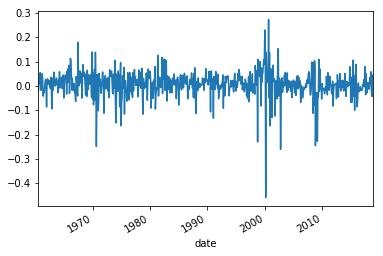

In [64]:
WML.plot()
WML.describe()

count    702.000000
mean       0.020665
std        0.075683
min       -0.472842
25%       -0.017539
50%        0.028240
75%        0.065831
max        0.247689
dtype: float64

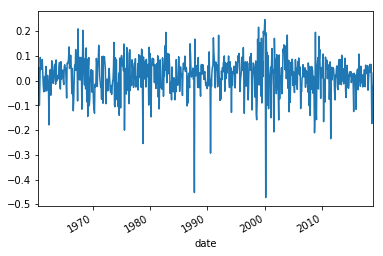

In [65]:
d10.plot()
d10.describe()

count    702.000000
mean       0.013085
std        0.083869
min       -0.403423
25%       -0.027685
50%        0.016736
75%        0.055965
max        0.441042
dtype: float64

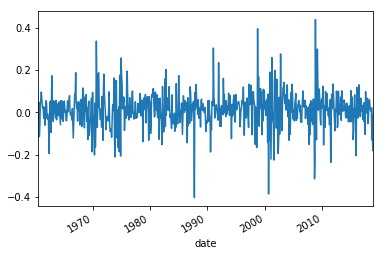

In [66]:
d1.plot()
d1.describe()

In [67]:
d10_1= d10 +1
d1_1 = d1 + 1
momentum1= WML +1



In [68]:
d9_1 = d9+1
d8_1 = d8+1
d7_1 = d7+1
d6_1 = d6+1
d5_1 = d5+1
d4_1 = d4+1
d3_1 = d3+1
d2_1 = d2+1

In [69]:
cumulative_momentum_df =momentum1.copy()
cumulative_momentum_df = cumulative_momentum_df.iloc[:]
cumulative_momentum_df = s.cumprod(cumulative_momentum_df)

cumulative_winner_df = d10_1.copy()
cumulative_winner_df = cumulative_winner_df.iloc[:]
cumulative_winner_df = s.cumprod(cumulative_winner_df)

cumulative_d9 = d9_1.copy()
cumulative_d9 = cumulative_d9.iloc[:]
cumulative_d9 = s.cumprod(cumulative_d9)

cumulative_d8 = d8_1.copy()
cumulative_d8 = cumulative_d8.iloc[:]
cumulative_d8 = s.cumprod(cumulative_d8)

cumulative_d7 = d7_1.copy()
cumulative_d7 = cumulative_d7.iloc[:]
cumulative_d7 = s.cumprod(cumulative_d7)

cumulative_d6 = d6_1.copy()
cumulative_d6 = cumulative_d6.iloc[:]
cumulative_d6 = s.cumprod(cumulative_d6)

cumulative_d5 = d5_1.copy()
cumulative_d5 = cumulative_d5.iloc[:]
cumulative_d5 = s.cumprod(cumulative_d5)

cumulative_d4 = d4_1.copy()
cumulative_d4 = cumulative_d4.iloc[:]
cumulative_d4 = s.cumprod(cumulative_d4)

cumulative_d3 = d3_1.copy()
cumulative_d3 = cumulative_d3.iloc[:]
cumulative_d3 = s.cumprod(cumulative_d3)

cumulative_d2 = d2_1.copy()
cumulative_d2 = cumulative_d2.iloc[:]
cumulative_d2 = s.cumprod(cumulative_d2)

cumulative_loser_df = d1_1.copy()
cumulative_loser_df = cumulative_loser_df.iloc[:]
cumulative_loser_df = s.cumprod(cumulative_loser_df)

In [70]:

#print (cumulative_momentum_df)

In [71]:
print (cumulative_winner_df)
#print (cumulative_loser_df)

date
1960-07-05         0.946567
1960-08-03         0.997518
1960-09-01         0.897790
1960-10-03         0.879528
1960-11-01         0.962472
1960-12-02         1.005856
1961-01-04         1.085725
1961-02-02         1.169933
1961-03-06         1.270152
1961-04-05         1.317694
1961-05-04         1.298572
1961-06-06         1.240640
1961-07-06         1.223049
1961-08-04         1.244035
1961-09-05         1.192060
1961-10-04         1.231062
1961-11-02         1.302476
1961-12-05         1.248745
1962-01-05         1.236318
1962-02-05         1.263318
1962-03-07         1.254176
1962-04-05         1.226845
1962-05-07         1.007635
1962-06-06         1.009800
1962-07-06         1.054219
1962-08-06         1.100036
1962-09-05         1.035551
1962-10-04         1.024892
1962-11-02         1.107550
1962-12-05         1.108487
                  ...      
2016-07-28    165910.080356
2016-08-26    173255.603396
2016-09-27    169294.044835
2016-10-26    179233.749110
2016-11-25    1

In [72]:

d9_d1 = d9 - d1
d9_d1_1 = d9_d1+ 1

cumulative_d9_d1 =d9_d1_1.copy()
cumulative_d9_d1 = cumulative_d9_d1.iloc[:]
cumulative_d9_d1 = s.cumprod(cumulative_d9_d1)

In [73]:
d6_d1 = d6 - d1
d6_d1_1 = d6_d1+ 1

cumulative_d6_d1 =d6_d1_1.copy()
cumulative_d6_d1 = cumulative_d6_d1.iloc[:]
cumulative_d6_d1 = s.cumprod(cumulative_d6_d1)

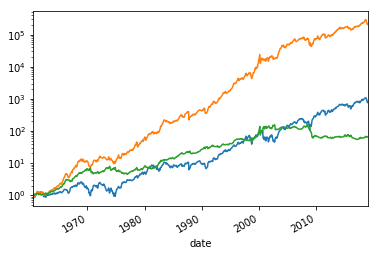

In [74]:
plt.yscale('log')
cumulative_loser_df.plot() #blue
cumulative_winner_df.plot() #orange
cumulative_momentum_df.plot() #green

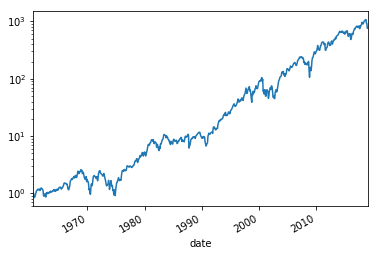

In [75]:
plt.yscale('log')
cumulative_loser_df.plot()

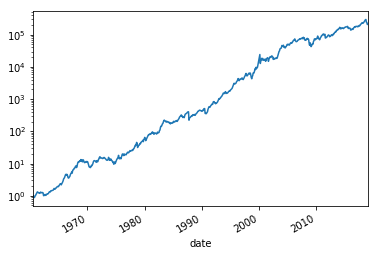

In [76]:
plt.yscale('log')
cumulative_winner_df.plot()

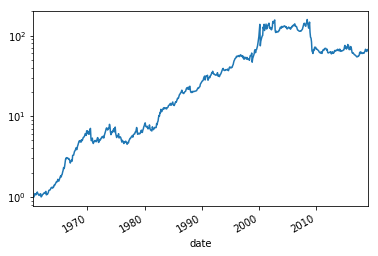

In [77]:
plt.yscale('log')
cumulative_momentum_df.plot()

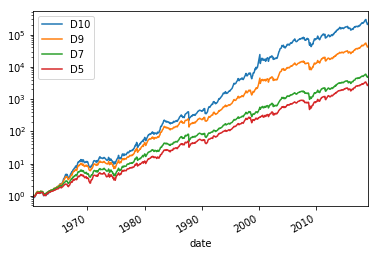

In [78]:
plt.yscale('log')

cumulative_winner_df.plot(label='D10')
cumulative_d9.plot(label='D9')
#cumulative_d8.plot(label='D8')
cumulative_d7.plot(label='D7')
#cumulative_d6.plot(label='D6')
cumulative_d5.plot(label='D5')
#cumulative_d4.plot(label='D4')
#cumulative_d3.plot(label='D3')
#cumulative_d2.plot(label='D2')
#cumulative_loser_df.plot(label='D1')

plt.legend(loc=2)

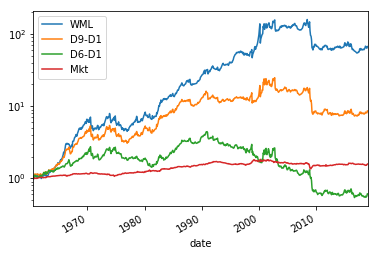

In [79]:
plt.yscale('log')

cumulative_momentum_df.plot(label = 'WML')
cumulative_d9_d1.plot(label = 'D9-D1')
cumulative_d6_d1.plot(label = 'D6-D1')


cumulative_Mkt.plot(label='Mkt')
plt.legend(loc=2)



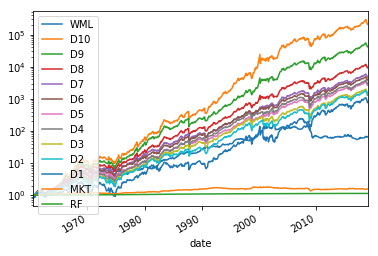

In [80]:
plt.yscale('log')
cumulative_momentum_df.plot(label='WML')
cumulative_winner_df.plot(label='D10')
cumulative_d9.plot(label='D9')
cumulative_d8.plot(label='D8')
cumulative_d7.plot(label='D7')
cumulative_d6.plot(label='D6')
cumulative_d5.plot(label='D5')
cumulative_d4.plot(label='D4')
cumulative_d3.plot(label='D3')
cumulative_d2.plot(label='D2')
cumulative_loser_df.plot(label='D1')
cumulative_Mkt.plot(label='MKT')
cumulative_RF.plot(label='RF')

plt.legend(loc=2)

In [81]:
#d10.to_excel(r'Daily_D10.xlsx')
#d9.to_excel(r'Daily_D9.xlsx')
#d8.to_excel(r'Daily_D8.xlsx')
#d7.to_excel(r'Daily_D7.xlsx')
#d6.to_excel(r'Daily_D6.xlsx')
#d5.to_excel(r'Daily_D5.xlsx')
#d4.to_excel(r'Daily_D4.xlsx')
#d3.to_excel(r'Daily_D3.xlsx')
#d2.to_excel(r'Daily_D2.xlsx')
#d1.to_excel(r'Daily_D1.xlsx')
#WML.to_excel(r'Daily_WML.xlsx')
#Mkt_RF.to_excel(r'Daily_Mkt-Rf.xlsx')
#RF.to_excel(r'Daily_Rf.xlsx')
#Mkt.to_excel(r'Daily_Mkt.xlsx')

In [82]:
#cumulative_momentum_df.to_excel(r'Daily_WML_cum.xlsx')
#cumulative_winner_df.to_excel(r'Daily_D10_cum.xlsx')
#cumulative_d9.to_excel(r'Daily_D9_cum.xlsx')
#cumulative_d8.to_excel(r'Daily_D8_cum.xlsx')
#cumulative_d7.to_excel(r'Daily_D7_cum.xlsx')
#cumulative_d6.to_excel(r'Daily_D6_cum.xlsx')
#cumulative_d5.to_excel(r'Daily_D5_cum.xlsx')
#cumulative_d4.to_excel(r'Daily_D4_cum.xlsx')
#cumulative_d3.to_excel(r'Daily_D3_cum.xlsx')
#cumulative_d2.to_excel(r'Daily_D2_cum.xlsx')
#cumulative_loser_df.to_excel(r'Daily_D1_cum.xlsx')
#cumulative_Mkt.to_excel(r'Daily_Mkt_cum.xlsx')
#cumulative_RF.to_excel(r'Daily_Rf_cum.xlsx')
#cumulative_Mkt_RF.to_excel(r'Daily_Mkt-Rf_cum.xlsx')

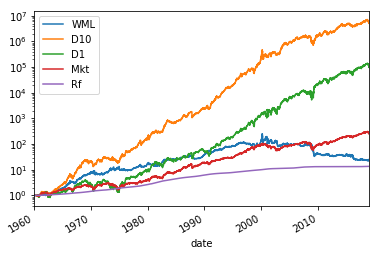

In [83]:
plt.yscale('log')

Daily_cum_wml_df.plot(label='WML')
Daily_cum_d10_df.plot(label='D10')
#Daily_cum_d9.plot(label='D9')
#Daily_cum_d8.plot(label='D8')
#Daily_cum_d7.plot(label='D7')
#Daily_cum_d6.plot(label='D6')
#Daily_cum_d5.plot(label='D5')
#Daily_cum_d4.plot(label='D4')
#Daily_cum_d3.plot(label='D3')
#Daily_cum_d2.plot(label='D2')
Daily_cum_d1_df.plot(label='D1')
Daily_cum_Mkt.plot(label='Mkt')
Daily_cum_RF.plot(label='Rf')
#Daily_cum_Mkt_RF.plot(label='Mkt-Rf')

plt.legend(loc=2)

count    14850.000000
mean         0.001136
std          0.013454
min         -0.169085
25%         -0.004628
50%          0.002057
75%          0.008065
max          0.169255
dtype: float64

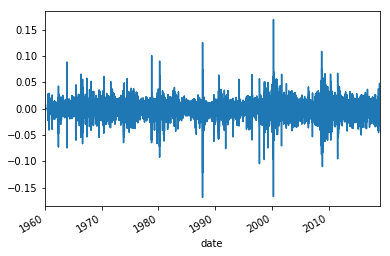

In [84]:
Daily_d10_df.plot(label='D10')
Daily_d10_df.describe()

In [85]:
Momentum_Daily.to_csv(r'Momentum_Daily.csv')

In [50]:
Daily_portfolios_df = pd.read_csv('./Momentum_Daily.csv',index_col=0,parse_dates=True)

In [51]:
#monthly_portfolios_df.index = monthly_portfolios_df.index
Daily_portfolios_df_100 = Daily_portfolios_df[127::]*100

In [52]:
Daily_Garch_df = Daily_portfolios_df_100

In [53]:
Daily_Garch_df.to_csv(r'Daily_Garch_df.csv')

In [54]:
Daily_Garch_df = pd.read_csv('./Daily_Garch_df.csv',index_col=0,parse_dates=True)

In [55]:
print(Daily_Garch_df )

                  D1        D2        D3        D4        D5        D6  \
date                                                                     
1960-07-05 -0.734541 -0.452777 -0.247345 -0.102797  0.168438  0.086530   
1960-07-06 -0.728965 -0.274965 -0.207861 -0.094200 -0.197193 -0.098604   
1960-07-07  1.398110  0.994893  0.574528  0.249138  0.646199  0.675076   
1960-07-08  0.437746  0.066154  0.347714  0.417583 -0.134371  0.272240   
1960-07-11 -0.795975 -0.502821 -1.226386 -0.828235 -0.761394 -0.733634   
1960-07-12 -0.457704 -1.312083 -0.785137 -0.759090 -0.885913 -1.121823   
1960-07-13 -0.143190  0.061157 -0.215227 -0.029794  0.124500  0.042057   
1960-07-14 -0.163674 -0.434001 -0.377636 -0.057499 -0.156819 -0.025574   
1960-07-15  0.090594  0.019380 -0.213913 -0.016820  0.423093 -0.125275   
1960-07-18 -0.778759 -1.212918 -0.529121 -0.373559 -0.465356 -0.527106   
1960-07-19 -0.049042 -0.058173 -0.019001  0.216048  0.210911 -0.396685   
1960-07-20  0.139733 -0.215177  0.3815

In [56]:
Vol_WML = arch_model(Daily_Garch_df['WML'], mean='constant', p=1, o=1, q=1)

In [57]:
res_WML = Vol_WML.fit(disp='off')
res_WML

                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:                    WML   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                  GJR-GARCH   Log-Likelihood:               -16655.1
Distribution:                  Normal   AIC:                           33320.3
Method:            Maximum Likelihood   BIC:                           33358.3
                                        No. Observations:                14723
Date:                Tue, Apr 30 2019   Df Residuals:                    14718
Time:                        18:51:05   Df Model:                            5
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0515  5.916e-03      8.712  2.995e-18 [3.

In [58]:
forecasts_WML = res_WML.forecast(start = '07-01-1960',method='simulation', horizon=1) 
print(forecasts_WML.residual_variance.dropna())

                 h.1
date                
1960-07-05  0.472374
1960-07-06  0.669563
1960-07-07  0.737770
1960-07-08  0.620360
1960-07-11  0.686836
1960-07-12  1.073777
1960-07-13  0.882414
1960-07-14  0.795780
1960-07-15  0.660441
1960-07-18  0.887473
1960-07-19  0.732463
1960-07-20  0.613738
1960-07-21  0.578198
1960-07-22  0.570710
1960-07-25  0.551716
1960-07-26  0.654369
1960-07-27  0.550684
1960-07-28  0.465695
1960-07-29  0.680068
1960-08-01  0.569284
1960-08-02  0.480428
1960-08-03  0.474958
1960-08-04  0.443401
1960-08-05  0.430224
1960-08-08  0.371590
1960-08-09  0.322850
1960-08-10  0.321685
1960-08-11  0.353395
1960-08-12  0.458209
1960-08-15  0.406366
...              ...
2018-11-15  0.494277
2018-11-16  0.512444
2018-11-19  1.060389
2018-11-20  0.869106
2018-11-21  0.758254
2018-11-23  0.871559
2018-11-26  0.756821
2018-11-27  0.678872
2018-11-28  0.570631
2018-11-29  0.539376
2018-11-30  0.467615
2018-12-03  0.515244
2018-12-04  0.554110
2018-12-06  0.497810
2018-12-07  0

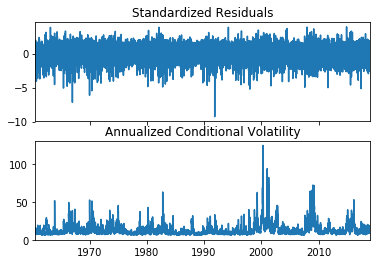

In [60]:
fig = res_WML.plot(annualize='D')

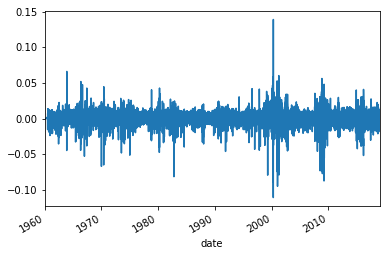

In [61]:
figure = monthly_portfolios_df['WML'].plot()

In [71]:
Dynamic_Daily = pd.read_csv('./Momentum_Daily.csv',index_col=0,parse_dates=True)


In [72]:
print(Dynamic_Daily)

                  D1        D2        D3        D4        D5        D6  \
date                                                                     
1960-01-04  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1960-01-05  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1960-01-06  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1960-01-07  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1960-01-08  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1960-01-11  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1960-01-12  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1960-01-13  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1960-01-14  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1960-01-15  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1960-01-18  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1960-01-19  0.000000  0.000000  0.0000

In [106]:
print(Dynamic_Daily)

                  D1        D2        D3        D4        D5        D6  \
date                                                                     
1960-01-04  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1960-01-05  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1960-01-06  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1960-01-07  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1960-01-08  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1960-01-11  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1960-01-12  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1960-01-13  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1960-01-14  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1960-01-15  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1960-01-18  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1960-01-19  0.000000  0.000000  0.0000

In [ ]:
Dynamic_Daily["Mkt_cum"] = (1.+ Dynamic_Daily["Mkt"]).rolling(window=504).agg(lambda x : x.prod()) -1.as<SS

In [107]:
Dynamic_Daily["I_b"]= (Dynamic_Daily["Mkt_cum"] < 0).astype(int)

In [109]:
Dynamic_Daily["I_b"].sum()

1941